# 陽的Euler法 #

  0.000389 seconds (1.76 k allocations: 579.750 KiB)


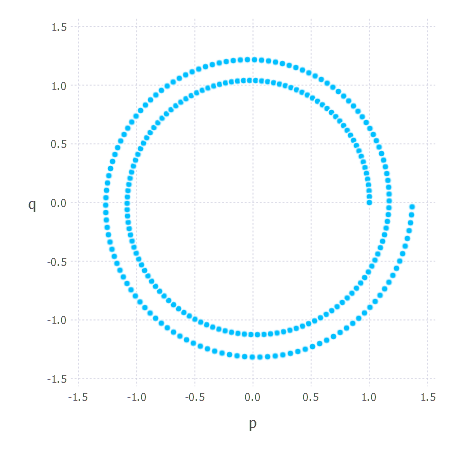

In [2]:
using Gadfly
dt = 0.05
function explicit_euler(p,q)
    p_new = p-q*dt
    q_new = q+p*dt
    return p_new, q_new
end
p0, q0 = 1.0, 0.0
p, q = p0, q0
pq = [p, q]
num =Int(div(4*pi,dt))
@time for i in 1:num
    p,q = explicit_euler(p,q)
    pq = hcat(pq, [p,q])
end
set_default_plot_size(12cm, 12cm)
plot(x=pq[1,1:num+1],y=pq[2,1:num+1],Guide.xlabel("p"),Guide.ylabel("q"),Coord.cartesian(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5))

# 陰的Euler法 #

  0.008927 seconds (2.56 k allocations: 594.672 KiB)


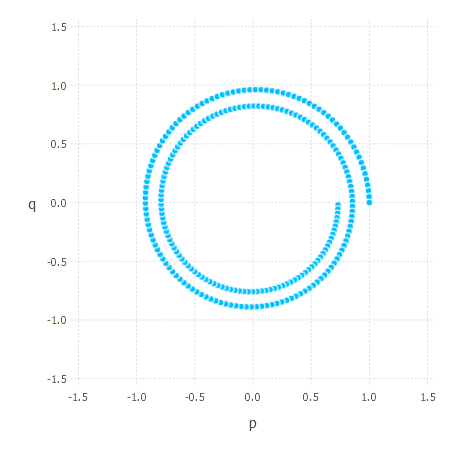

In [3]:
using Gadfly
dt=0.05
function implicit_euler(p,q)
    const denom=1+dt^2
    p_new = (p-dt*q)/denom
    #qは除算無しで計算できる。
    q_new = dt*p_new+q
    return p_new, q_new
end
p0, q0 = 1.0, 0.0
p, q = p0, q0
pq = [p, q]
num =Int(div(4*pi,dt))
@time for i in 1:num
    p,q = implicit_euler(p,q)
    pq = hcat(pq, [p,q])
end
set_default_plot_size(12cm, 12cm)
plot(x=pq[1,1:num+1],y=pq[2,1:num+1],Guide.xlabel("p"),Guide.ylabel("q"),Coord.cartesian(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5))

# 台形公式

  0.005230 seconds (522 allocations: 30.409 KiB)


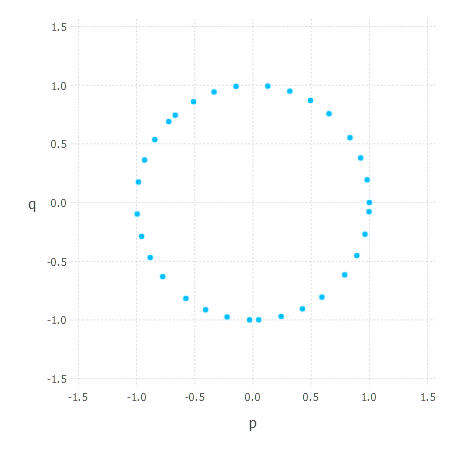

In [4]:
using Gadfly
dt=5
function trapezoidal(p,q)
    const dt2=dt*dt
    const denom=4+dt^2
    p_new = ((4-dt2)*p-4dt*q)/denom
    #qは除算無しで計算できる。
    q_new = dt*(p_new+p)/2+q
    return p_new, q_new
end
p0, q0 = 1.0, 0.0
p, q = p0, q0
pq = [p, q]
num =Int(div(50*pi,dt))
@time for i in 1:num
    p,q = trapezoidal(p,q)
    pq = hcat(pq, [p,q])
end
set_default_plot_size(12cm, 12cm)
plot(x=pq[1,1:num+1],y=pq[2,1:num+1],Guide.xlabel("p"),Guide.ylabel("q"),Coord.cartesian(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5))

# Runge-Kutta法
    1.安定な例

  0.016831 seconds (4.58 k allocations: 272.512 KiB)


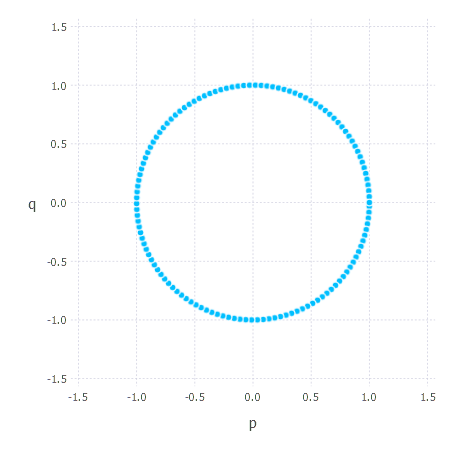

In [5]:
using Gadfly
dt=0.05
function RungeKutta(p,q)
    const A=(24-12*dt^2+dt^4)/24
    const B=dt*(dt^2-6)/6
    p_new = A*p+B*q
    q_new = A*q-B*p
    return p_new, q_new
end
p0, q0 = 1.0, 0.0
p, q = p0, q0
pq = [p, q]
num =Int(div(2pi,dt))
@time for i in 1:num
    p,q = RungeKutta(p,q)
    pq = hcat(pq, [p,q])
end
set_default_plot_size(12cm, 12cm)
plot(x=pq[1,1:num+1],y=pq[2,1:num+1],Guide.xlabel("p"),Guide.ylabel("q"),Coord.cartesian(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5))

    2.不安定な例

  0.015250 seconds (1.88 k allocations: 85.512 KiB)


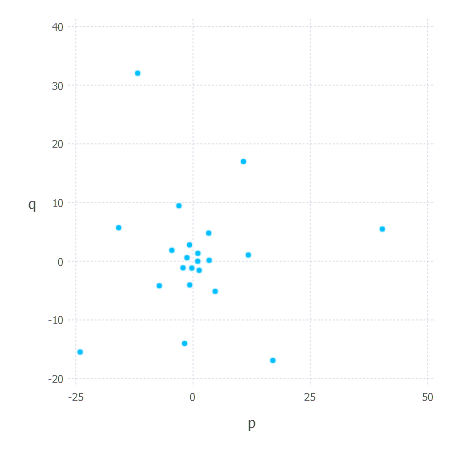

In [6]:
using Gadfly
dt=2.9
function RungeKutta(p,q)
    const A=(24-12*dt^2+dt^4)/24
    const B=dt*(dt^2-6)/6
    p_new = A*p+B*q
    q_new = A*q-B*p
    return p_new, q_new
end
p0, q0 = 1.0, 0.0
p, q = p0, q0
pq = [p, q]
num =Int(div(20pi,dt))
@time for i in 1:num
    p,q = RungeKutta(p,q)
    pq = hcat(pq, [p,q])
end
set_default_plot_size(12cm, 12cm)
plot(x=pq[1,1:num+1],y=pq[2,1:num+1],Guide.xlabel("p"),Guide.ylabel("q"))